In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
train = pd.read_csv("reco/train.csv")
test = pd.read_csv("reco/test.csv")
sub = pd.read_csv("reco/sample_submission.csv")

In [3]:
train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [4]:
test.head()

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TEST_000000,USER_00008,BOOK_047966,37.0,"vermilion, ohio, usa",Birds of Prey: A Novel of Suspense,J.A. Jance,2002.0,Avon
1,TEST_000001,USER_00008,BOOK_119494,37.0,"vermilion, ohio, usa",Midnight Voices,JOHN SAUL,2003.0,Ballantine Books
2,TEST_000002,USER_00008,BOOK_151775,37.0,"vermilion, ohio, usa",Breaking Free : A Prescription for Personal an...,David M. Noer,1996.0,Jossey-Bass
3,TEST_000003,USER_00008,BOOK_176255,37.0,"vermilion, ohio, usa",Bitter Harvest,Ann Rule,1999.0,Pocket
4,TEST_000004,USER_00008,BOOK_187307,37.0,"vermilion, ohio, usa",Embraced by the Light,Betty J. Eadie,1994.0,Bantam Books


In [6]:
!pip install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 324 kB 10.5 MB/s            
     |████████████████████████████████| 345 kB 35.3 MB/s            
     |████████████████████████████████| 102 kB 42.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 296 kB 36.2 MB/s            
     |████████████████████████████████| 9.9 MB 65.7 MB/s            
     |████████████████████████████████| 293 kB 14.5 MB/s            
     |████████████████████████████████| 679 kB 17.6 MB/s            
     |████████████████████████████████| 4.7 MB 25.4 MB/s            
     |████████████████████████████████| 33.8 MB 12.6 MB/s            
     |████████████████████████████████| 233 kB 16.1 MB/s            
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=32b7710ee9cfe0424b199bda3948de060db379bafc541d09b120cbc0d1a1774e
  Stored in directory: /home/work/.ca

In [7]:
from pandas_profiling import ProfileReport

train.profile_report()

/tmp/ipykernel_103/1363585426.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
train['Age'].va

35.0     251455
33.0      27349
29.0      25456
30.0      23085
31.0      22515
          ...  
118.0         1
109.0         1
147.0         1
123.0         1
132.0         1
Name: Age, Length: 137, dtype: int64

In [23]:
train[train['Age'] >= 90]["Age"].value_counts()

116.0    968
103.0    417
201.0    285
104.0    184
97.0     127
239.0    116
101.0    113
100.0    112
136.0     97
204.0     93
148.0     51
228.0     48
90.0      45
168.0     40
93.0      34
92.0      25
209.0     20
141.0     17
151.0     17
220.0     15
229.0     11
152.0     10
96.0       8
128.0      8
140.0      8
244.0      7
199.0      6
223.0      5
108.0      5
99.0       4
146.0      4
127.0      4
124.0      4
212.0      2
237.0      2
219.0      2
138.0      2
200.0      2
226.0      1
132.0      1
98.0       1
105.0      1
107.0      1
157.0      1
109.0      1
147.0      1
118.0      1
114.0      1
123.0      1
Name: Age, dtype: int64

In [24]:
train.shape

(871393, 10)

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Book-Rating          871393 non-null  int64  
 4   Age                  871393 non-null  float64
 5   Location             871393 non-null  object 
 6   Book-Title           871393 non-null  object 
 7   Book-Author          871393 non-null  object 
 8   Year-Of-Publication  871393 non-null  float64
 9   Publisher            871393 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [28]:
train_num = train.select_dtypes(include=['float64'])

In [31]:
Q1 = train["Age"].quantile(0.25)
Q3 = train["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = train[(train["Age"] < lower_bound) | (train["Age"] > upper_bound)].index.tolist()

In [34]:
outliers_age = pd.DataFrame(outliers_age)
outliers_age

,0
0,143
1,145
2,176
3,314
4,401
...,...
61771,870913
61772,870914
61773,870915
61774,870916


In [38]:
Q1 = train["Age"].quantile(0.25)
Q1

31.0

In [39]:
Q3 = train["Age"].quantile(0.75)
Q3

41.0

In [40]:
IQR = Q3 - Q1
IQR

10.0

In [50]:
Q2 = train["Age"].quantile(0.01)
Q2

15.0

In [71]:
Q3 = train["Age"].quantile(0.996)
Q3

80.0

In [78]:
Q6 = train["Age"].quantile(0.999)
Q6

127.60800000012387

In [80]:
train['Age'].median()

35.0

In [26]:
train['Age'] = np.where((train['Age'] == 0) | (train['Age'] >= 80), 35, train['Age'])
test['Age'] = np.where((test['Age'] == 0) | (test['Age'] >= 80), 35, test['Age'])

In [27]:
train[train["Year-Of-Publication"] == -1].iloc[:,8].value_counts().sum()

11515

In [28]:
train["Year-Of-Publication"].median()

1997.0

In [29]:
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

### 여기서부터 콘텐츠 기반 필터링 시작

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Book-Title을 기반으로 특성 추출
title_vectorizer = TfidfVectorizer()
title_matrix = title_vectorizer.fit_transform(train['Book-Title'])

# Book-Author을 기반으로 특성 추출
author_vectorizer = TfidfVectorizer()
author_matrix = author_vectorizer.fit_transform(train['Book-Author'])

In [31]:
from sklearn.preprocessing import StandardScaler

# Year-Of-Publication 스케일링
year_scaler = StandardScaler()
year_scaled = year_scaler.fit_transform(train[['Year-Of-Publication']])

In [32]:
from sklearn.decomposition import TruncatedSVD

n_components = 200  # 변경 가능한 값으로, 원하는 차원 수를 선택합니다.
svd = TruncatedSVD(n_components=n_components)

title_matrix_reduced = svd.fit_transform(title_matrix)
author_matrix_reduced = svd.fit_transform(author_matrix)

X = np.concatenate([title_matrix_reduced, author_matrix_reduced, year_scaled], axis=1)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, train['Book-Rating'], test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.819596362147247


### 딥러닝

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2

In [13]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

2023-04-27 08:40:56.899374: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 08:40:57.600501: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6689 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:3f:00.0, compute capability: 7.5
/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [14]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.6763 - val_loss: 14.5216
Epoch 2/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.5485 - val_loss: 14.4972
Epoch 3/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.5052 - val_loss: 14.5048
Epoch 4/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.4780 - val_loss: 14.4665
Epoch 5/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.4527 - val_loss: 14.4545
Epoch 6/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.4355 - val_loss: 14.4423
Epoch 7/500
4357/4357 [==============================] - 16s 4ms/step - loss: 14.4132 - val_loss: 14.4257
Epoch 8/500
4357/4357 [==============================] - 17s 4ms/step - loss: 14.4005 - val_loss: 14.4393
Epoch 9/500
4357/4357 [==============================] - 15s 3ms/step - loss: 14.3807 - val_loss: 14.4221
Epoch 10/500
4357/4357 [======================

In [15]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

5447/5447 [==============================] - 9s 2ms/step
Root Mean Squared Error: 3.8194436625733723


### 정규화, Early Stopping

In [35]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [36]:
history = model.fit(X_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
4357/4357 [==============================] - 19s 4ms/step - loss: 15.5660 - val_loss: 14.8466
Epoch 2/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8771 - val_loss: 14.8583
Epoch 3/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8730 - val_loss: 14.8419
Epoch 4/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8728 - val_loss: 14.8472
Epoch 5/500
4357/4357 [==============================] - 19s 4ms/step - loss: 14.8719 - val_loss: 14.8410
Epoch 6/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8729 - val_loss: 14.8483
Epoch 7/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8721 - val_loss: 14.8404
Epoch 8/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8719 - val_loss: 14.8407
Epoch 9/500
4357/4357 [==============================] - 18s 4ms/step - loss: 14.8714 - val_loss: 14.8411
Epoch 10/500
4357/4357 [======================

In [38]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

5447/5447 [==============================] - 9s 2ms/step
Root Mean Squared Error: 3.848602675184224


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   871393 non-null  category
 1   User-ID              871393 non-null  category
 2   Book-ID              871393 non-null  category
 3   Book-Rating          871393 non-null  int64   
 4   Age                  871393 non-null  float64 
 5   Location             871393 non-null  category
 6   Book-Title           871393 non-null  category
 7   Book-Author          871393 non-null  category
 8   Year-Of-Publication  871393 non-null  float64 
 9   Publisher            871393 non-null  category
dtypes: category(7), float64(2), int64(1)
memory usage: 105.1 MB


### object type을 catetory화 시키기

In [33]:
for column in train.columns:
    if train[column].dtype == 'object':
        train[column] = train[column].astype('category')

In [34]:
# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, train['Book-Rating'], test_size=0.2, random_state=42)

# 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3.813516138856568


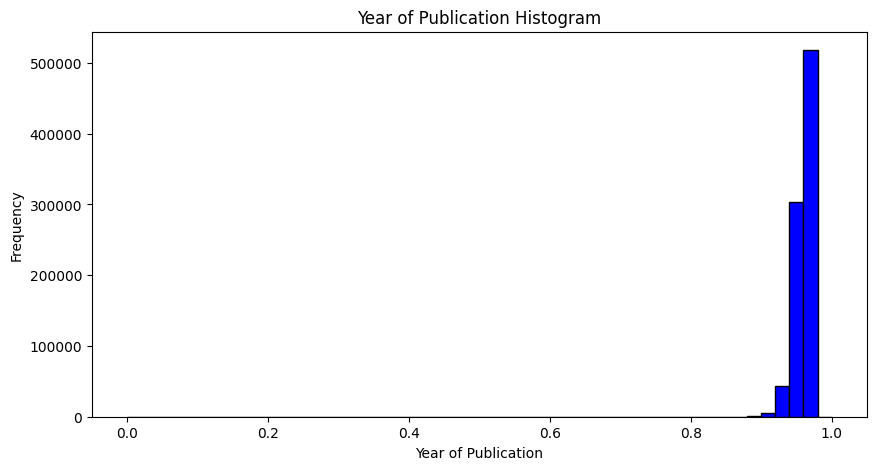

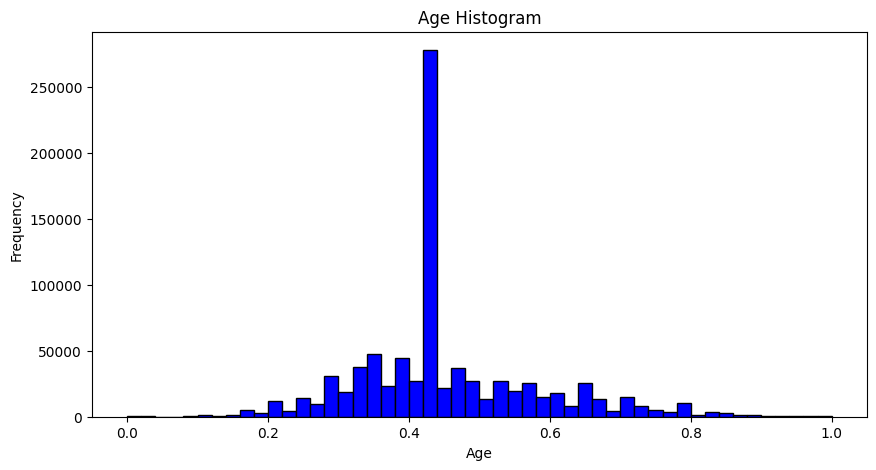

In [9]:
import matplotlib.pyplot as plt

# 'Year-Of-Publication' 히스토그램
plt.figure(figsize=(10, 5))
plt.hist(train_encoded['Year-Of-Publication'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Year of Publication')
plt.ylabel('Frequency')
plt.title('Year of Publication Histogram')
plt.show()

# 'Age' 히스토그램
plt.figure(figsize=(10, 5))
plt.hist(train_encoded['Age'], bins=50, color='blue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Histogram')
plt.show()

### MinMaxScaler를 이용한 콘텐츠기반딥러닝

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [17]:
train = pd.read_csv("reco/train.csv")
test = pd.read_csv("reco/test.csv")
sub = pd.read_csv("reco/sample_submission.csv")

In [18]:
train['Age'] = np.where((train['Age'] == 0) | (train['Age'] >= 80), 35, train['Age'])
test['Age'] = np.where((test['Age'] == 0) | (test['Age'] >= 80), 35, test['Age'])
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

In [ ]:
# 데이터 전처리 범주형 열을 one-hot 인코딩 시켜준다. 
# 'User-ID', 'Book-ID', 'Location', 'Book-Title', 'Book-Author', 'Publisher' 다했더니 커널이 죽는다. 챗지피티 질문
# 1. Book-Author와 Publisher만 원핫인코딩
train_encoded = pd.get_dummies(train, columns=['Book-Author', 'Publisher'])

In [19]:
# 2. 범주형 변수에서 가장 빈도가 높은 상위 N개의 범주만 사용하여 원-핫 인코딩
# 상위 N개 범주만 유지
N = 200
top_N_authors = train['Book-Author'].value_counts().head(N).index
top_N_publishers = train['Publisher'].value_counts().head(N).index

# 상위 N개 범주에 속하지 않는 경우 'Other'로 대체
train['Book-Author'] = train['Book-Author'].apply(lambda x: x if x in top_N_authors else 'Other')
train['Publisher'] = train['Publisher'].apply(lambda x: x if x in top_N_publishers else 'Other')

# 원-핫 인코딩 적용
train_encoded = pd.get_dummies(train, columns=['Book-Author', 'Publisher'])

In [8]:
scaler = MinMaxScaler()
train_encoded[['Age', 'Year-Of-Publication']] = scaler.fit_transform(train_encoded[['Age', 'Year-Of-Publication']])

In [20]:
from sklearn.model_selection import train_test_split

X = train_encoded.drop('Book-Rating', axis=1)
y = train_encoded['Book-Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=30)

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=1000, verbose=1, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.mean_squared_error(y_test, y_pred)
rmse = tf.sqrt(mse)
print("Root Mean Squared Error:", rmse.numpy())

### 행렬 인수분해 기법 사용 (AIS) 실패 SVD로 전환

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [5]:
train['Age'] = np.where((train['Age'] == 0) | (train['Age'] >= 80), 35, train['Age'])
test['Age'] = np.where((test['Age'] == 0) | (test['Age'] >= 80), 35, test['Age'])
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

In [8]:
import pandas as pd
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split

user_item_rating = train[["User-ID", "Book-ID", "Book-Rating"]]

# 데이터를 Surprise 라이브러리 형식으로 변환
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(user_item_rating, reader)

# Train/Test 분리
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [9]:
# SVD 알고리즘을 사용하여 모델 구축 및 학습
algo = SVD()
algo.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = algo.test(testset)

In [10]:
# 성능 평가 (RMSE)
from surprise import accuracy
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

RMSE: 3.4935
RMSE: 3.4935


In [16]:
# 원래의 테스트 데이터에서 Book-Rating 예측
test["Book-Rating"] = test.apply(lambda row: algo.predict(row["User-ID"], row["Book-ID"]).est, axis=1)

# 결과를 저장할 데이터프레임 생성 및 결합
sub = sub.copy()
sub["Book-Rating"] = test["Book-Rating"]

# 결과를 CSV 파일로 저장
sub.to_csv(f"svd{rmse:.4f}.csv", index=False)

### SVD 에서 특성 엔지니어링 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from surprise import Dataset, Reader
from surprise import SVD

In [72]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [73]:
# train['Age'] = np.where((train['Age'] == 0) | (train['Age'] >= 80), 35, train['Age'])
# test['Age'] = np.where((test['Age'] == 0) | (test['Age'] >= 80), 35, test['Age'])
# train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
# test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

train['Age'] = np.where(train['Age'] == 0, 15, np.where(train['Age'] >= 80, 80, train['Age']))
test['Age'] = np.where(test['Age'] == 0, 15, np.where(test['Age'] >= 80, 80, test['Age']))
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])
# filtered_train = train[train['Location'].str.count(',') != 2]

In [74]:
from sklearn.model_selection import train_test_split

# Train/Validation 데이터 분할
train_data, val_data = train_test_split(filtered_train, test_size=0.2, random_state=42)

# 사용자별 평균 평점 특성 생성
user_mean_rating = train_data.groupby('User-ID')['Book-Rating'].mean().reset_index()
user_mean_rating.columns = ['User-ID', 'User-Mean-Rating']

# 사용자별 평균 평점을 train_data와 val_data에 병합
train_data = train_data.merge(user_mean_rating, on='User-ID', how='left')
val_data = val_data.merge(user_mean_rating, on='User-ID', how='left')

# 사용자별 평균 평점이 결측치인 경우, 전체 평균 평점으로 대체
mean_rating = train_data['Book-Rating'].mean()
train_data['User-Mean-Rating'] = train_data['User-Mean-Rating'].fillna(mean_rating)
val_data['User-Mean-Rating'] = val_data['User-Mean-Rating'].fillna(mean_rating)

# 사용자별 평균 평점을 포함한 새로운 데이터프레임 생성
user_item_rating_mean = train_data[["User-ID", "Book-ID", "User-Mean-Rating"]]

In [75]:
# 데이터를 Surprise 라이브러리 형식으로 변환
reader = Reader(rating_scale=(0, 10))
data_mean = Dataset.load_from_df(user_item_rating_mean, reader)

In [76]:
# 전체 데이터를 trainset으로 변환
trainset = data_mean.build_full_trainset()

# SVD 알고리즘을 사용하여 모델 구축 및 학습
algo = SVD(random_state=42,
          n_epochs= 100 , 
          lr_all= 0.01,
          n_factors = 200,
          reg_all = 0.06,
          verbose=True)
algo.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [77]:
# 검증 데이터에 대한 예측
val_data["predicted_rating"] = val_data.apply(lambda row: algo.predict(row["User-ID"], row["Book-ID"]).est, axis=1)

In [78]:
# 성능 평가 (RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(val_data["Book-Rating"], val_data["predicted_rating"], squared=False)
print(f"RMSE: {rmse:.4f}")

RMSE: 3.7539


In [13]:
# 원래의 테스트 데이터에서 Book-Rating 예측
test["Book-Rating"] = test.apply(lambda row: algo.predict(row["User-ID"], row["Book-ID"]).est, axis=1)

# 결과를 저장할 데이터프레임 생성 및 결합
sub = sub.copy()
sub["Book-Rating"] = test["Book-Rating"]

# 결과를 CSV 파일로 저장
sub.to_csv(f"svd{rmse:.4f}.csv", index=False)

### 사용자별 평가 횟수, 책별 평가 횟수

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [29]:
train['Age'] = np.where((train['Age'] == 0) | (train['Age'] >= 80), 35, train['Age'])
test['Age'] = np.where((test['Age'] == 0) | (test['Age'] >= 80), 35, test['Age'])
train['Year-Of-Publication'] = np.where(train['Year-Of-Publication'] == -1, 1997, train['Year-Of-Publication'])
test['Year-Of-Publication'] = np.where(test['Year-Of-Publication'] == -1, 1997, test['Year-Of-Publication'])

In [44]:
from sklearn.model_selection import train_test_split

# Train/Validation 데이터 분할
train_data, val_data = train_test_split(train, test_size=0.2, random_state=42)

# 사용자별 평균 평점 특성 생성
user_mean_rating = train_data.groupby('User-ID')['Book-Rating'].mean().reset_index()
user_mean_rating.columns = ['User-ID', 'User-Mean-Rating']

# 사용자별 평균 평점을 train_data와 val_data에 병합
train_data = train_data.merge(user_mean_rating, on='User-ID', how='left')
val_data = val_data.merge(user_mean_rating, on='User-ID', how='left')

# 사용자별 평균 평점이 결측치인 경우, 전체 평균 평점으로 대체
mean_rating = train_data['Book-Rating'].mean()
train_data['User-Mean-Rating'] = train_data['User-Mean-Rating'].fillna(mean_rating)
val_data['User-Mean-Rating'] = val_data['User-Mean-Rating'].fillna(mean_rating)

# 사용자별 평가 횟수 계산
user_rating_count = train_data.groupby('User-ID')['Book-Rating'].count().reset_index()
user_rating_count.columns = ['User-ID', 'User-Rating-Count']

# 책별 평가 횟수 계산
book_rating_count = train_data.groupby('Book-ID')['Book-Rating'].count().reset_index()
book_rating_count.columns = ['Book-ID', 'Book-Rating-Count']

# 사용자별 평가 횟수를 train_data와 val_data에 병합
train_data = train_data.merge(user_rating_count, on='User-ID', how='left')
val_data = val_data.merge(user_rating_count, on='User-ID', how='left')

# 책별 평가 횟수를 train_data와 val_data에 병합
train_data = train_data.merge(book_rating_count, on='Book-ID', how='left')
val_data = val_data.merge(book_rating_count, on='Book-ID', how='left')


# 사용자별 평균 평점을 포함한 새로운 데이터프레임 생성
user_item_rating_mean = train_data[["User-ID", "Book-ID", "User-Mean-Rating"]]

In [50]:
from sklearn.model_selection import train_test_split

# Train/Validation 데이터 분할
train_data, val_data = train_test_split(cleaned_data, test_size=0.2, random_state=42)

# 사용자별 평균 평점 특성 생성
user_mean_rating = train_data.groupby('User-ID')['Book-Rating'].mean().reset_index()
user_mean_rating.columns = ['User-ID', 'User-Mean-Rating']

# 사용자별 평균 평점을 train_data와 val_data에 병합
train_data = train_data.merge(user_mean_rating, on='User-ID', how='left')
val_data = val_data.merge(user_mean_rating, on='User-ID', how='left')

# 사용자별 평균 평점이 결측치인 경우, 전체 평균 평점으로 대체
mean_rating = train_data['Book-Rating'].mean()
train_data['User-Mean-Rating'] = train_data['User-Mean-Rating'].fillna(mean_rating)
val_data['User-Mean-Rating'] = val_data['User-Mean-Rating'].fillna(mean_rating)

# 사용자별 평가 횟수 계산
user_rating_count = train_data.groupby('User-ID')['Book-Rating'].count().reset_index()
user_rating_count.columns = ['User-ID', 'User-Rating-Count']

# 책별 평가 횟수 계산
book_rating_count = train_data.groupby('Location')['Book-Rating'].count().reset_index()
book_rating_count.columns = ['Location', 'Book-Rating-Count']

# 사용자별 평가 횟수를 train_data와 val_data에 병합
train_data = train_data.merge(user_rating_count, on='User-ID', how='left')
val_data = val_data.merge(user_rating_count, on='User-ID', how='left')

# 책별 평가 횟수를 train_data와 val_data에 병합
train_data = train_data.merge(book_rating_count, on='Location', how='left')
val_data = val_data.merge(book_rating_count, on='Location', how='left')


# 사용자별 평균 평점을 포함한 새로운 데이터프레임 생성
user_item_rating_mean = train_data[["User-ID", "Location", "User-Mean-Rating"]]

In [51]:
# 데이터를 Surprise 라이브러리 형식으로 변환
reader = Reader(rating_scale=(0, 10))
data_mean = Dataset.load_from_df(user_item_rating_mean, reader)

In [52]:
# 전체 데이터를 trainset으로 변환
trainset = data_mean.build_full_trainset()

# SVD 알고리즘을 사용하여 모델 구축 및 학습
algo = SVD(random_state=42,
          n_epochs= 60, 
          lr_all= 0.01,
          n_factors = 200,
          reg_all = 0.06,
          verbose=True)
algo.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [53]:
# 검증 데이터에 대한 예측
val_data["predicted_rating"] = val_data.apply(lambda row: algo.predict(row["User-ID"], row["Book-ID"]).est, axis=1)

In [54]:
# 성능 평가 (RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(val_data["Book-Rating"], val_data["predicted_rating"], squared=False)
print(f"RMSE: {rmse:.4f}")

RMSE: 3.6294


In [ ]:
# 원래의 테스트 데이터에서 Book-Rating 예측
test["Book-Rating"] = test.apply(lambda row: algo.predict(row["User-ID"], row["Book-ID"]).est, axis=1)

# 결과를 저장할 데이터프레임 생성 및 결합
sub = sub.copy()
sub["Book-Rating"] = test["Book-Rating"]

# 결과를 CSV 파일로 저장
sub.to_csv(f"svd{rmse:.4f}.csv", index=False)

In [19]:
train.head()

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book


In [79]:
filtered_train = train[train['Location'].str.count(',') != 2]
filtered_data.shape

(2864, 10)

In [35]:
filtered_data

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
1962,TRAIN_001962,USER_00276,BOOK_139444,10,64.0,"endicott,ny, new york, usa","Friday Night Lights: A Town, a Team, and a Dream",H. G. Bissinger,1991.0,Perennial
6666,TRAIN_006666,USER_00725,BOOK_149102,0,35.0,"26655 westerstede, niedersachsen, lk ammerland...",Der Hahn ist tot. Roman.,Ingrid Noll,1993.0,Diogenes Verlag
7568,TRAIN_007568,USER_00911,BOOK_101484,10,29.0,"efland, nc 27243, north carolina, usa",The Ithon,Anonymous,2003.0,Infinity Publishing (PA)
7569,TRAIN_007569,USER_00911,BOOK_174611,5,29.0,"efland, nc 27243, north carolina, usa",A Big Storm Knocked It over: A Novel,Laurie Colwin,1993.0,Harpercollins
8239,TRAIN_008239,USER_01044,BOOK_084346,6,41.0,"tellico plains, tn, tennessee, usa",The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
...,...,...,...,...,...,...,...,...,...,...
870194,TRAIN_870194,USER_91906,BOOK_216059,0,35.0,"washington, d.c., district of columbia, usa",Educating Tigers,Wendy Sand Eckel,2000.0,Publishamerica
870195,TRAIN_870195,USER_91906,BOOK_233883,5,35.0,"washington, d.c., district of columbia, usa",Death Kit,Susan Sontag,1991.0,Anchor
870196,TRAIN_870196,USER_91906,BOOK_256804,1,35.0,"washington, d.c., district of columbia, usa",The Dive From Clausen's Pier (Alex Awards),ANN PACKER,2002.0,Knopf
870608,TRAIN_870608,USER_92040,BOOK_042883,0,48.0,"granger,, indiana, usa",Tuxedo Park : A Wall Street Tycoon and the Sec...,Jennet Conant,2002.0,Simon &amp; Schuster


In [36]:
filtered_indices = filtered_data.index
cleaned_data = train.drop(filtered_indices)

In [41]:
cleaned_data.to_csv('cleaned_data.csv', index=False)

In [80]:
cleaned_data.shape

(868529, 10)